In [3]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, regularizers
from tensorflow.keras.utils import plot_model

# 定义主要输入和辅助输入
main_input = Input(shape=(748, 1), name='main_input')
aux_input = Input(shape=(1,), name='aux_input')

# 卷积模块函数
def conv_block(x, filters, kernel_size=3, pool_size=2):
    x = layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=pool_size)(x)
    return x

# 共享卷积层
x = conv_block(main_input, filters=32)
x = conv_block(x, filters=64)
x = layers.Flatten()(x)

# 合并输入
combined = layers.Concatenate(axis=-1)([x, aux_input])

# 全连接层模块
def dense_block(x, units, dropout_rate=0.5):
    x = layers.Dense(units=units, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=dropout_rate)(x)
    return x

# 全连接层
x = dense_block(combined, units=64)
x = dense_block(x, units=32, dropout_rate=0)  # 最后一层不需要 Dropout

# 输出层
output = layers.Dense(units=1, activation='sigmoid', name="cyber_sickness")(x)

# 构建模型
model = Model(inputs=[main_input, aux_input], outputs=output)

# 编译模型
model.compile(
    loss=tf.keras.losses.Huber(),  # 使用 Huber Loss
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mean_squared_error']
)

# 可视化模型结构并保存为横向展示的图片
plot_model(model, to_file='model_structure_simplified.png', show_shapes=True, show_layer_names=True, rankdir='LR')

# 打印模型摘要
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ main_input          │ (None, 748, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 746, 32)   │        128 │ main_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 746, 32)   │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 373, 32)   │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 371, 64)   │      6,208 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 371, 64)   │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 185, 64)   │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 11840)     │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 11841)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ aux_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    757,888 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cyber_sickness      │ (None, 1)         │         33 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 767,105 (2.93 MB)

 Trainable params: 766,721 (2.92 MB)

 Non-trainable params: 384 (1.50 KB)

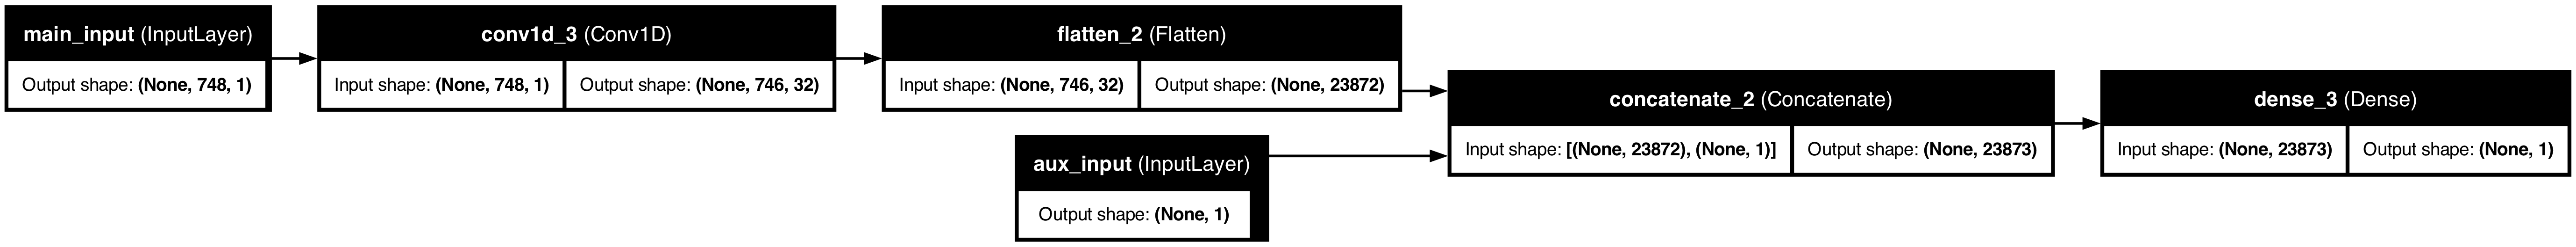

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.utils import plot_model

# 定义一个简单的模型
main_input = Input(shape=(748, 1), name='main_input')
shared_layer = layers.Conv1D(filters=32, kernel_size=3, activation='relu')(main_input)
shared_layer = layers.Flatten()(shared_layer)
aux_input = Input(shape=(1,), name='aux_input')
combined_input = layers.Concatenate(axis=-1)([shared_layer, aux_input])
output = layers.Dense(1, activation='sigmoid')(combined_input)

model = Model(inputs=[main_input, aux_input], outputs=output)

# 尝试可视化模型结构
plot_model(model, to_file='simple_model_structure.png', show_shapes=True, show_layer_names=True, rankdir='LR')
